In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv")

In [3]:
X = data.x
y = data.y
X = pd.DataFrame(X)
linear = LinearRegression().fit(X, y)
xx = np.arange(X.x.min(axis=0), X.x.max(axis=0))
yy = linear.predict(pd.DataFrame(xx))
transformation = PolynomialFeatures(degree=2)
transformation.fit(X)
X_2 = transformation.transform(X)
poly_2d = LinearRegression().fit(X_2, y)
xx_2d = transformation.transform(pd.DataFrame(xx))
yy_2d = poly_2d.predict(xx_2d)

c:\Users\Datanomica\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Datanomica\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv",
                   index_col=0)
y = data.y
X = data.drop(["y"], axis=1)
logistic = LogisticRegression().fit(X, y)
xx, yy = np.meshgrid(
    np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
    np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

Z = logistic.predict(XX).reshape(xx.shape)
class_transform = PolynomialFeatures(degree=3, include_bias=False)
X_3 = class_transform.fit_transform(X)
class_3 = LogisticRegression().fit(X_3, y)
Z = class_3.predict(class_transform.transform(XX)).reshape(xx.shape)

C:\Users\Datanomica\AppData\Local\Temp\ipykernel_2212\3710914805.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
C:\Users\Datanomica\AppData\Local\Temp\ipykernel_2212\3710914805.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
c:\Users\Datanomica\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Datanomica\AppData\Local\Programs\Python\Python313\Lib\site

In [5]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
data_kc_prices.shape
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
y_pred_kc_prices = reg_kc_multiple.predict(X_kc_prices)
poly_features_kc_prices = PolynomialFeatures(degree=2)
X_3_kc_prices = poly_features_kc_prices.fit_transform(X_kc_prices)
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
y_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)

1)В выполненной работе добавьте замер времени обучения каждой модели.

In [6]:
import time

# time.time()

2)На датасете "gen_regression" постройте модель пятого, десятого и сотого порядков. Сравните эффективность и время обучения каждой модели.

c:\Users\Datanomica\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


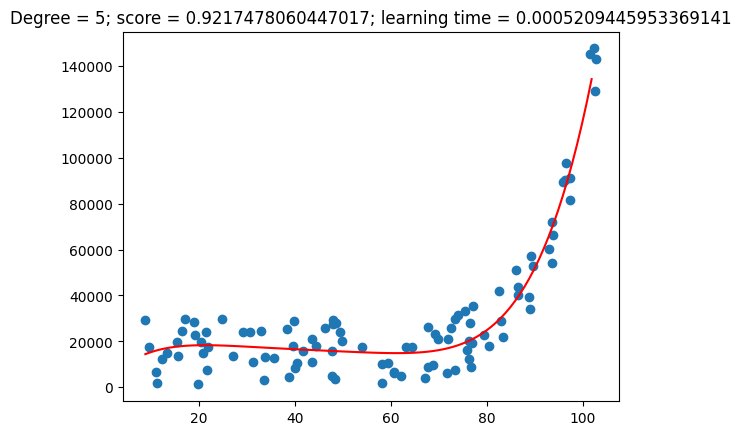

c:\Users\Datanomica\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


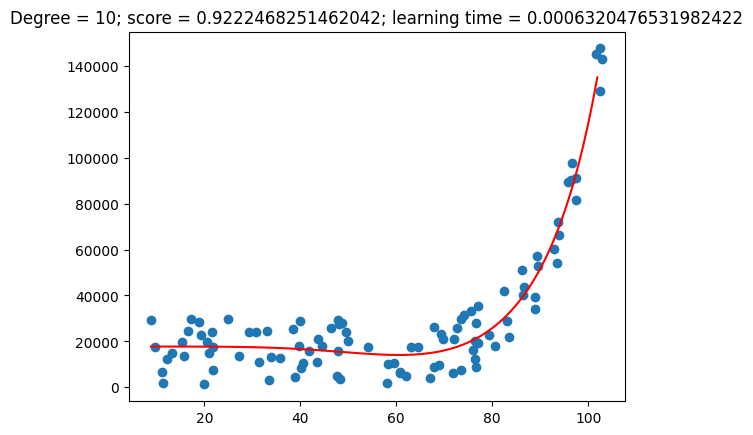

c:\Users\Datanomica\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


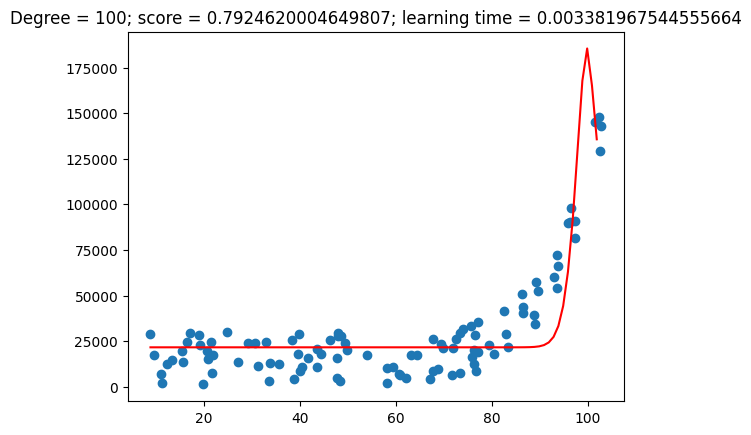

In [7]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv")

X = data.x
y = data.y

X = pd.DataFrame(X)

def gen_regression (X, y, degree):
  transformation = PolynomialFeatures(degree=degree)
  transformation.fit(X)
  X_trans = transformation.transform(X)
  start = time.time()
  poly = LinearRegression().fit(X_trans, y)
  stop = time.time()
  xx = np.arange(X.x.min(axis=0), X.x.max(axis=0))
  xx_trans = transformation.transform(pd.DataFrame(xx))
  yy_trans = poly.predict(xx_trans)
  yy = poly.predict(pd.DataFrame(xx_trans))
  plt.scatter(X.x, y)
  plt.plot(xx, yy, c='r')
  plt.title(f'Degree = {degree}; score = {poly.score(X_trans, y)}; learning time = {stop - start}')
  plt.show()
  return [poly.score(X_trans, y), stop - start, degree]

gen_reg_data = []
for degree in [5, 10, 100]:
  gen_reg_data.append(gen_regression(X, y, degree))

3)То же самое проделайте с датасетом для классификации и "King county".

----------------------------------------------------------------------------------------------------
GEN_CLASSIFICATION
----------------------------------------------------------------------------------------------------


C:\Users\Datanomica\AppData\Local\Temp\ipykernel_2212\2301836565.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
C:\Users\Datanomica\AppData\Local\Temp\ipykernel_2212\2301836565.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
c:\Users\Datanomica\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


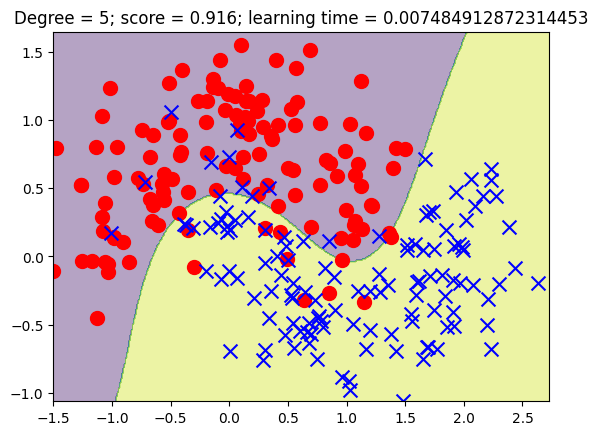

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
GEN_CLASSIFICATION
----------------------------------------------------------------------------------------------------


C:\Users\Datanomica\AppData\Local\Temp\ipykernel_2212\2301836565.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
C:\Users\Datanomica\AppData\Local\Temp\ipykernel_2212\2301836565.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
c:\Users\Datanomica\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


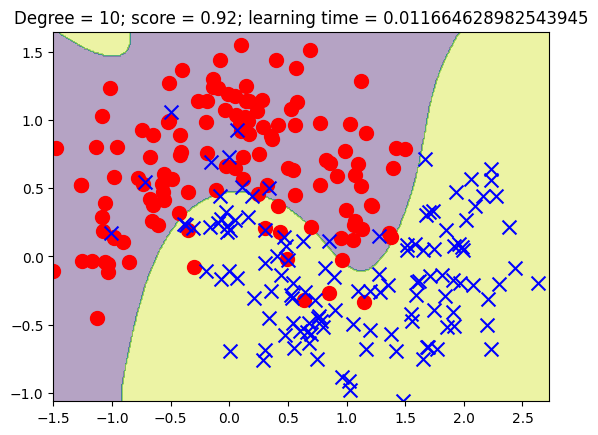

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
GEN_CLASSIFICATION
----------------------------------------------------------------------------------------------------


c:\Users\Datanomica\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Datanomica\AppData\Local\Temp\ipykernel_2212\2301836565.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
C:\Users\Datanomica\AppData\Local\Temp\ipykernel_2212\2301836565.py:23: FutureWarning: Series.__getitem__ treating keys as positions 

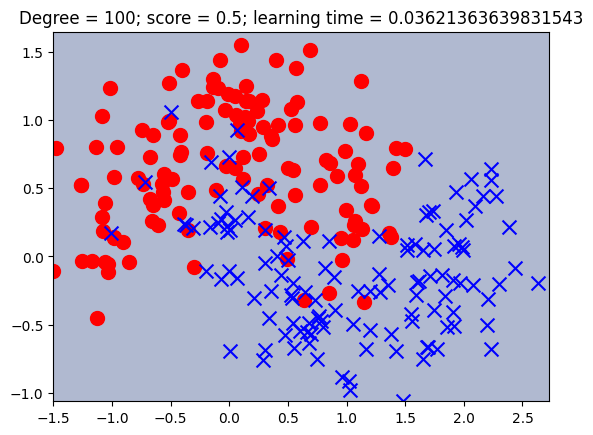

----------------------------------------------------------------------------------------------------
KING CITY
----------------------------------------------------------------------------------------------------


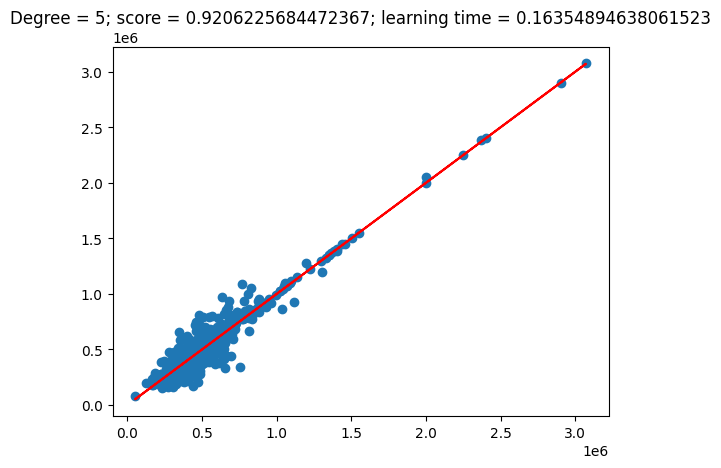

KING CITY
----------------------------------------------------------------------------------------------------


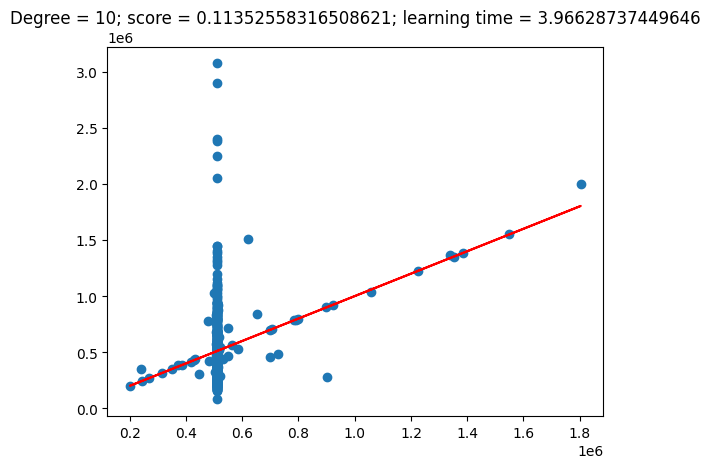

In [8]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv",
                   index_col=0)

data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")

# данные gen_classification
y = data.y
X = data.drop(["y"], axis=1)
# данные King City
y_kc_prices = data_kc_prices.price[:500]
X_kc_prices = data_kc_prices.drop(["id", "date", "price", "yr_renovated", "zipcode","condition", "grade","floors", "long","view", "bedrooms", "bathrooms", "waterfront"], axis=1)[:500]
X_kc_prices.head()

def learning_for_classification(X, y, degree):
  class_transform = PolynomialFeatures(degree=degree)
  X_transf = class_transform.fit_transform(X)
  start = time.time()
  model = LogisticRegression().fit(X_transf, y)
  stop = time.time()

  xx, yy = np.meshgrid(
    np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
    np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
  XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
  Z = model.predict(class_transform.transform(XX)).reshape(xx.shape)
  plt.contourf(xx, yy, Z, alpha=0.4)
  plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
  plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

  plt.title(f'Degree = {degree}; score = {model.score(X_transf, y)}; learning time = {stop - start}')
  plt.show()

  return [model.score(X_transf, y), stop - start, degree]

def learning_for_classification_2(X_kc_prices, y_kc_prices, degree):
  X_kc_prices_ = (poly_features_kc_prices := PolynomialFeatures(degree=degree)).fit_transform(X_kc_prices)
  start = time.time()
  reg_poly_kc = LinearRegression().fit(X_kc_prices_, y_kc_prices)
  stop = time.time()

  y_pred_kc_prices = reg_poly_kc.predict(X_kc_prices_)
  plt.scatter(y_pred_kc_prices, y_kc_prices)
  plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

  plt.title(f'Degree = {degree}; score = {reg_poly_kc.score(X_kc_prices_, y_kc_prices)}; learning time = {stop - start}')
  plt.show()
  return [reg_poly_kc.score(X_kc_prices_, y_kc_prices), stop - start, degree]


list_data_gen_classif = []
list_data_city = []
for degree in [5, 10, 100]:
  print("-"*100)
  print("GEN_CLASSIFICATION")
  print("-"*100)
  list_data_gen_classif.append(learning_for_classification(X, y, degree))
  print("-"*100)
for degree in [5, 10]:
  print("KING CITY")
  print("-"*100)
  list_data_city.append(learning_for_classification_2(X_kc_prices, y_kc_prices, degree))
list_data_city.append([None, None,None,None])

4)Составьте таблицу эффективности разных моделей для каждой задачи. В таблице должна быть информация о времени обучения модели и получившейся точности. Сделайте вывод о целесообразности применения разных степеней полиномов.

In [9]:
models = []
degrees =[]
scores = []
times = []

for model, name in [(gen_reg_data, "GEN_REGRESSION"), (list_data_gen_classif, "GEN_CLASSIFICATION"), (list_data_city, "KING CITY")]:
  for type_ in model:
    models.append(name)
    degrees.append(type_[2])
    scores.append(type_[0])
    times.append(type_[1])
pd.DataFrame({"Model": models, "degree":degrees, "score":scores, "time":times})

,Model,degree,score,time
0,GEN_REGRESSION,5.0,0.921748,0.000521
1,GEN_REGRESSION,10.0,0.922247,0.000632
2,GEN_REGRESSION,100.0,0.792462,0.003382
3,GEN_CLASSIFICATION,5.0,0.916000,0.007485
4,GEN_CLASSIFICATION,10.0,0.920000,0.011665
5,GEN_CLASSIFICATION,100.0,0.500000,0.036214
6,KING CITY,5.0,0.920623,0.163549
7,KING CITY,10.0,0.113526,3.966287
8,KING CITY,NaN,NaN,NaN


5)Для линейной модели в задаче о продаже домов выведите коэффициенты модели и названия соответствующих атрибутов. Сделайте вывод об относительной важности атрибутов.

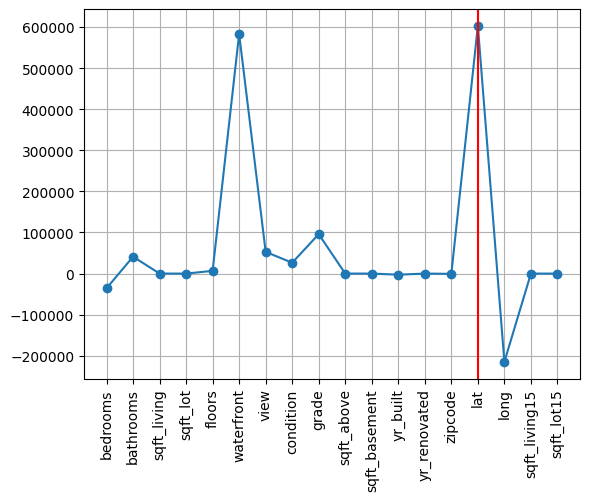

In [10]:
reg_kc_multiple.coef_

data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")

y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)

# for lable, coef in zip(X_kc_prices.columns, reg_kc_multiple.coef_):
#   print(f'Признак: {lable} | Коэфициент : {coef}')
#   print("_"*100)
plt.plot(X_kc_prices.columns, reg_kc_multiple.coef_, marker='o')
plt.xticks(rotation=90)
plt.grid(visible = True)

plt.axvline("lat", color= 'red')
plt.show()

6)Попробуйте также проинтерпретировать полиномиальную модель.

In [11]:
reg_poly2_kc.coef_

array([-3.84970908e-03, -9.84915060e+00,  3.78937832e+00, -2.03710295e+03,
       -1.47670667e+02,  6.77192314e+00,  7.03555010e-01,  6.83709554e+00,
       -9.67756794e+00,  8.88075426e+00,  1.42087927e+04, -1.62458869e+04,
       -2.48759093e+02,  3.17877675e+04, -7.92870037e+01, -1.43490745e-02,
        3.78947560e-01,  1.47863761e+04,  1.13689861e+03,  5.78341501e+02,
        2.30977390e+02, -1.43099137e+01,  7.60264987e-02,  1.36897260e+04,
        1.05176111e+02,  1.42260654e+03, -1.65060546e+03, -2.66847360e+03,
       -3.83323518e+00, -1.04766546e+01, -1.44999977e+02, -7.02487467e+00,
        3.89546215e+00, -1.16122638e+03,  2.58993638e+02,  1.35717576e+01,
        1.83688540e-02, -2.98344373e+03,  1.28337532e+01, -4.28534415e-01,
       -2.43150419e+04,  3.70012150e+02,  5.86168358e+03, -9.59671605e+03,
        1.86123731e+04,  1.29224378e+01, -8.86851868e-02,  2.04801496e+02,
       -2.13662077e+01, -4.17757889e+00, -5.93560522e+02,  2.91131118e+02,
       -7.27209097e+00,  